In [1]:
import numpy as np
import pandas as pd


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

automobile = automobile.data.original

In [3]:
automobile.head(100)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,128.0,nissan,gas,std,2.0,hatchback,fwd,front,94.5,165.6,...,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7799.0,1
96,122.0,nissan,gas,std,4.0,sedan,fwd,front,94.5,165.3,...,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7499.0,1
97,103.0,nissan,gas,std,4.0,wagon,fwd,front,94.5,170.2,...,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,7999.0,1
98,168.0,nissan,gas,std,2.0,hardtop,fwd,front,95.1,162.4,...,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37,8249.0,2


In [4]:
automobile.isnull().sum()

normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
symboling             0
dtype: int64

In [5]:
categorical = [var for var in automobile.columns if automobile[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 8 categorical variables

The categorical variables are : ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']


In [6]:
automobile[categorical].head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


In [7]:
automobile[categorical].isnull().sum()

make               0
fuel-type          0
aspiration         0
body-style         0
drive-wheels       0
engine-location    0
engine-type        0
fuel-system        0
dtype: int64

In [8]:
automobile.shape

(205, 26)

In [9]:
# find numerical variables

numerical = [var for var in automobile.columns if automobile[var].dtype!='O' and var!='symboling' ]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [10]:
automobile[numerical].head()

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
automobile[numerical].isnull().sum()

normalized-losses    41
num-of-doors          2
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
# Separate features and target class
X = automobile.drop(columns=['symboling'])
y = automobile['symboling']

# Identify numerical and categorical columns
numeric_features = numerical
categorical_features = categorical

# Define preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Pass through columns not specified in transformers
)

# Apply preprocessing to the features only
X_preprocessed = preprocessor.fit_transform(X)

# Get the names of transformed columns
transformed_feature_names = list(numeric_features) + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Create a DataFrame with transformed features
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=transformed_feature_names + list(X.columns[len(transformed_feature_names):]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42) # 80% training and 20% test

# DECISION TREE

In [14]:
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier()

In [15]:
# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_dt = GridSearchCV(estimator = dt_clf,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [16]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_dt.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_dt.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_dt.best_estimator_))

GridSearch CV best score : 0.7924


Parameters that give the best results : 

 {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=13)


In [17]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=24, min_samples_leaf=1, random_state=42)
# Train Decision Tree Classifer
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

In [18]:
print('Training set score: {:.4f}'.format(dt_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7805


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=dt_clf.score(X_test,y_test)
print("\nThe accuracy of decision tree classifier dataset is "+str(round(accuracy*100,2))+"%")

[[ 1  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  1 13  3  1  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  3  2  0]
 [ 0  0  0  0  0  4]]

The accuracy of decision tree classifier dataset is 78.05%


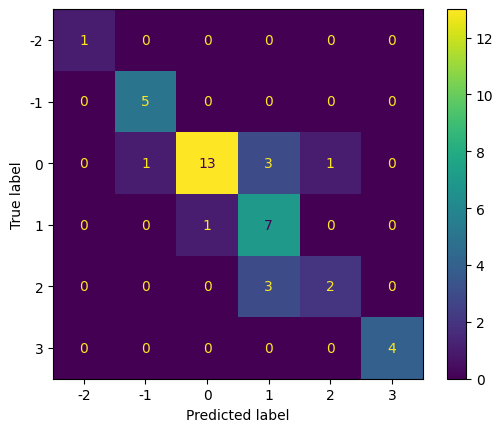

In [20]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels=dt_clf.classes_)
cm_display.plot()
plt.show()

In [21]:
y_pred_lr = dt_clf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.83      1.00      0.91         5
           0       0.93      0.72      0.81        18
           1       0.54      0.88      0.67         8
           2       0.67      0.40      0.50         5
           3       1.00      1.00      1.00         4

    accuracy                           0.78        41
   macro avg       0.83      0.83      0.81        41
weighted avg       0.82      0.78      0.78        41



# NAIVE BAYES

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_clf = GaussianNB()

In [24]:
# Hyper tuning for Decision Tree classifier
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_serach_nb = GridSearchCV(estimator = nb_clf,
                           param_grid = params_NB,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_nb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [25]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_nb.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_nb.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_nb.best_estimator_))

GridSearch CV best score : 0.6280


Parameters that give the best results : 

 {'var_smoothing': 0.0015199110829529332}


Estimator that was chosen by the search : 

 GaussianNB(var_smoothing=0.0015199110829529332)


In [26]:
nb_clf = GaussianNB(var_smoothing=0.0015199110829529332)
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print('Training set score: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(nb_clf.score(X_test, y_test)))

Training set score: 0.7622
Test set score: 0.5366


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=nb_clf.score(X_test,y_test)
print("\nThe accuracy of  Naive bayes classifier on dataset is "+str(round(accuracy*100,2))+"%")

[[1 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 1 7 3 7 0]
 [0 0 0 4 3 1]
 [0 0 1 2 2 0]
 [0 0 0 0 1 3]]

The accuracy of  Naive bayes classifier on dataset is 53.66%


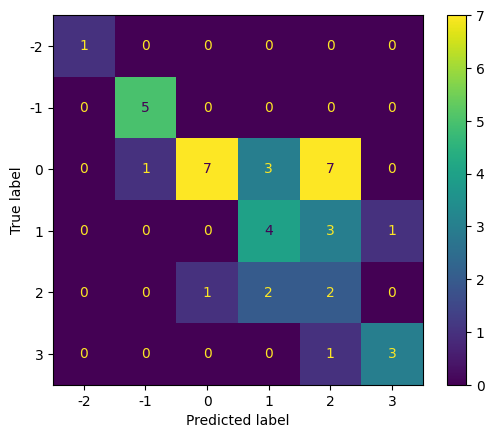

In [28]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels=nb_clf.classes_)
cm_display.plot()
plt.show()

In [29]:
y_pred_lr = nb_clf.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.83      1.00      0.91         5
           0       0.88      0.39      0.54        18
           1       0.44      0.50      0.47         8
           2       0.15      0.40      0.22         5
           3       0.75      0.75      0.75         4

    accuracy                           0.54        41
   macro avg       0.68      0.67      0.65        41
weighted avg       0.69      0.54      0.56        41



# SVM(Support Vector Machine)

In [30]:
from sklearn.svm import SVC
svm_clf = SVC(C=1)

In [31]:
param_grid = [
  {'kernel':['linear']},
  {'kernel':['rbf'], 'gamma':[0.001, 0.0001]}
]

In [32]:
grid_serach_svm = GridSearchCV(estimator = svm_clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_svm.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid=[{'kernel': ['linear']},
                         {'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='accuracy', verbose=1)

In [33]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_svm.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_svm.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_svm.best_estimator_))

GridSearch CV best score : 0.7551


Parameters that give the best results : 

 {'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [34]:
svm_clf = SVC(C=1, kernel='linear')

In [35]:
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print('Training set score: {:.4f}'.format(svm_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm_clf.score(X_test, y_test)))

Training set score: 0.9695
Test set score: 0.7073


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=svm_clf.score(X_test,y_test)
print("\nThe accuracy of SVM classifier  on  dataset is "+str(round(accuracy*100,2))+"%")

[[ 1  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  1 12  2  2  1]
 [ 0  0  2  5  0  1]
 [ 0  0  0  3  2  0]
 [ 0  0  0  0  0  4]]

The accuracy of SVM classifier  on  dataset is 70.73%


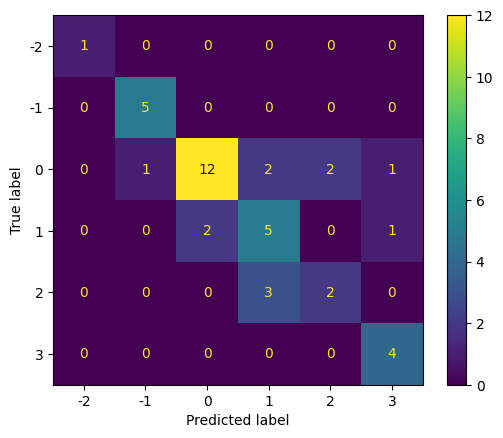

In [37]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels=svm_clf.classes_)
cm_display.plot()
plt.show()

In [38]:
y_pred_lr = svm_clf.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_lr))

SVM Classifier report: 

               precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.83      1.00      0.91         5
           0       0.86      0.67      0.75        18
           1       0.50      0.62      0.56         8
           2       0.50      0.40      0.44         5
           3       0.67      1.00      0.80         4

    accuracy                           0.71        41
   macro avg       0.73      0.78      0.74        41
weighted avg       0.73      0.71      0.71        41



# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [40]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_serach_knn = GridSearchCV(estimator = knn_clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [41]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_knn.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_knn.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_knn.best_estimator_))

GridSearch CV best score : 0.7432


Parameters that give the best results : 

 {'n_neighbors': 1}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=1)


In [42]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [43]:
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print('Training set score: {:.4f}'.format(knn_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7561


In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=knn_clf.score(X_test,y_test)
print("\nThe accuracy of KNN classifier  on  dataset is "+str(round(accuracy*100,2))+"%")

[[ 1  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 1  2 13  1  1  0]
 [ 0  0  1  6  0  1]
 [ 0  0  0  3  2  0]
 [ 0  0  0  0  0  4]]

The accuracy of KNN classifier  on  dataset is 75.61%


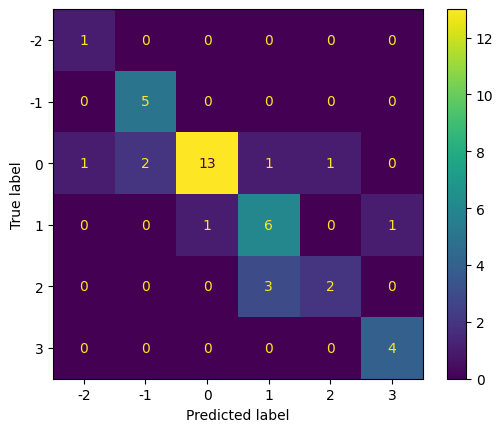

In [45]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels=knn_clf.classes_)
cm_display.plot()
plt.show()

In [46]:
y_pred_lr = knn_clf.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_lr))

KNN Classifier report: 

               precision    recall  f1-score   support

          -2       0.50      1.00      0.67         1
          -1       0.71      1.00      0.83         5
           0       0.93      0.72      0.81        18
           1       0.60      0.75      0.67         8
           2       0.67      0.40      0.50         5
           3       0.80      1.00      0.89         4

    accuracy                           0.76        41
   macro avg       0.70      0.81      0.73        41
weighted avg       0.78      0.76      0.75        41



# CART

In [47]:
cart = DecisionTreeClassifier()

In [48]:
# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_cart = GridSearchCV(estimator = cart,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_cart.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [49]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_cart.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_cart.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_cart.best_estimator_))

GridSearch CV best score : 0.7252


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=19)


In [50]:
cart = DecisionTreeClassifier(max_depth=18)
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)
print('Training set score: {:.4f}'.format(cart.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cart.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7561


In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=cart.score(X_test,y_test)
print("\nThe accuracy of decision tree classifier dataset is "+str(round(accuracy*100,2))+"%")

[[ 1  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  1 11  0  4  2]
 [ 0  1  0  6  1  0]
 [ 0  0  0  1  4  0]
 [ 0  0  0  0  0  4]]

The accuracy of decision tree classifier dataset is 75.61%


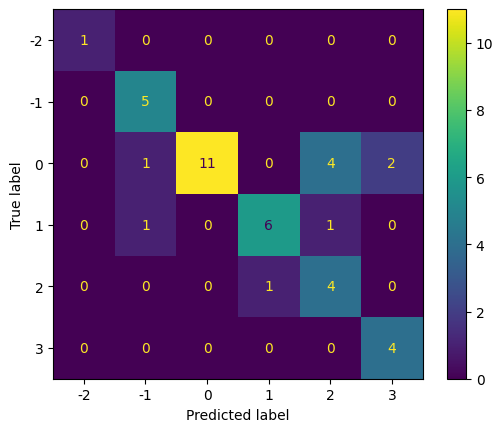

In [52]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels=cart.classes_)
cm_display.plot()
plt.show()

In [53]:
y_pred_lr = cart.predict(X_test)
print("CART Classifier report: \n\n", classification_report(y_test, y_pred_lr))

CART Classifier report: 

               precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.71      1.00      0.83         5
           0       1.00      0.61      0.76        18
           1       0.86      0.75      0.80         8
           2       0.44      0.80      0.57         5
           3       0.67      1.00      0.80         4

    accuracy                           0.76        41
   macro avg       0.78      0.86      0.79        41
weighted avg       0.84      0.76      0.76        41



In [54]:
cart = DecisionTreeClassifier()

# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_cart = GridSearchCV(estimator = cart,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_cart.fit(X_train, y_train)



# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_cart.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_cart.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_cart.best_estimator_))

GridSearch CV best score : 0.7070


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=14)


In [55]:
cart = DecisionTreeClassifier(max_depth=24)
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)
print('Training set score: {:.4f}'.format(cart.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cart.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7805


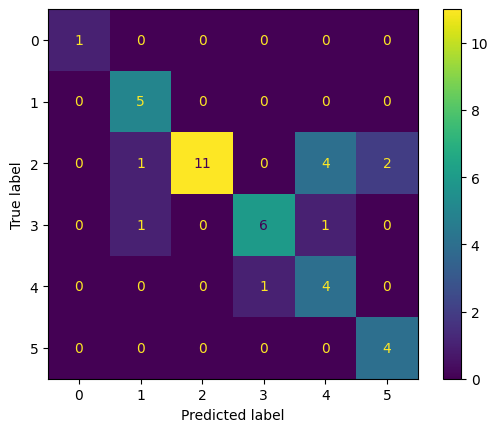

In [56]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [57]:
y_pred_lr = cart.predict(X_test)
print("CART Classifier report: \n\n", classification_report(y_test, y_pred_lr))

CART Classifier report: 

               precision    recall  f1-score   support

          -2       0.50      1.00      0.67         1
          -1       0.71      1.00      0.83         5
           0       1.00      0.67      0.80        18
           1       0.75      0.75      0.75         8
           2       0.67      0.80      0.73         5
           3       0.67      1.00      0.80         4

    accuracy                           0.78        41
   macro avg       0.72      0.87      0.76        41
weighted avg       0.83      0.78      0.78        41

